In [104]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
from preprocessing import *
from model import *
import math
import matplotlib.pyplot as plt

# to autoreload modules on code change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data preprocessing using pandas!!

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df.count()

emotion    35887
pixels     35887
Usage      35887
dtype: int64

In [4]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [5]:
df2 = df.groupby('emotion').count()
df2

,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


## distribution of whole dataset 

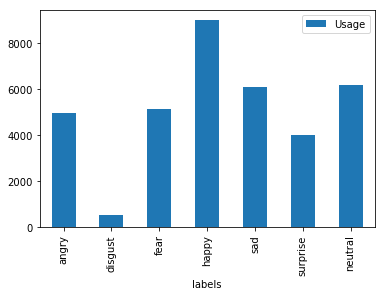

In [6]:
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']
df2['labels'] = pd.Series(emotion_labels)
df2.reset_index().plot(kind='bar',x='labels',y='Usage')

## distribution of train dataset 

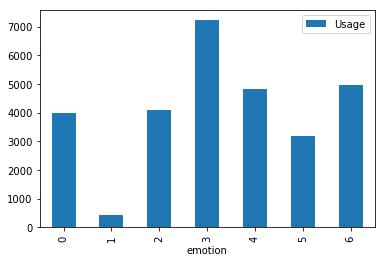

In [60]:
df[df['Usage'] == 'Training'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')
df_train = df[df['Usage'] == 'Training']

## distribution of test set

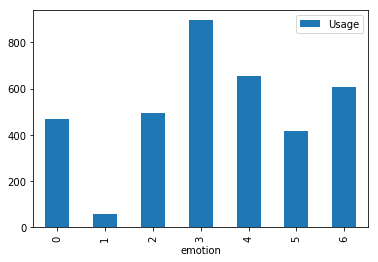

In [8]:
df[df['Usage'] == 'PublicTest'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')

## Distribution of private test set!!

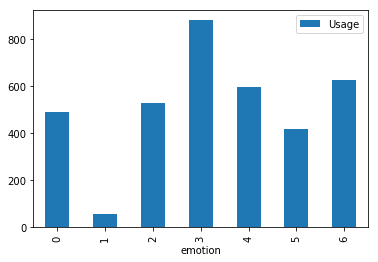

In [9]:
df[df['Usage'] == 'PrivateTest'].groupby('emotion').count().reset_index().plot(kind='bar',x='emotion',y='Usage')

** The distibution of all the three set is same hence this sanity check is completed **

In [10]:
train_df = df[df['Usage'] == 'Training']
val_df = df[df['Usage'] == 'PublicTest']

In [108]:
df_val = val_df
df_val.shape

(3589, 3)

In [86]:
df.shape

(35887, 3)

In [72]:
train_indices = np.arange(train_df.shape[0])
np.random.shuffle(train_indices)

In [84]:
idx = train_indices[0:64]
print(get_subset(df,indices=idx)[0])
train_df.iloc[idx]

[['71' '75' '59' ..., '255' '255' '255']
 ['72' '58' '79' ..., '110' '110' '75']
 ['55' '52' '62' ..., '44' '55' '44']
 ..., 
 ['133' '115' '55' ..., '133' '133' '133']
 ['46' '36' '28' ..., '80' '92' '73']
 ['42' '41' '47' ..., '30' '28' '24']]


,emotion,pixels,Usage
28146,0,71 75 59 36 29 60 46 60 68 52 59 45 55 64 68 5...,Training
11552,3,72 58 79 79 59 71 59 18 43 75 87 89 85 84 85 8...,Training
4468,0,55 52 62 67 49 51 67 80 104 119 97 93 149 199 ...,Training
6724,5,47 52 50 68 73 52 81 106 132 164 172 173 177 1...,Training
14924,3,79 92 97 112 115 120 133 143 148 149 150 155 1...,Training
15597,4,30 27 31 78 107 108 109 108 104 109 117 124 12...,Training
395,6,63 62 44 36 54 69 110 196 209 215 207 210 222 ...,Training
26771,6,169 169 169 169 170 168 176 131 35 21 18 35 41...,Training
727,0,138 127 91 57 50 35 55 43 44 50 46 35 31 33 32...,Training
23891,3,29 24 11 10 12 16 22 28 69 105 133 151 166 177...,Training


In [56]:
assert get_subset(df,0,400)[0].shape[0] == 400
get_subset(df,0,400)[0].shape

(400, 2304)

In [102]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[None,2304],name='X')
y = tf.placeholder(tf.int64,shape=[None],name='y')
is_training = tf.placeholder(tf.bool)
y_out = model1(X,y)

total_loss = tf.losses.softmax_cross_entropy(tf.one_hot(y,7),y_out)
mean_loss = tf.reduce_mean(total_loss)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5)
train_step = optimizer.minimize(total_loss)

training
Iteration 0: with minibatch training loss = 109 and accuracy of 0.17
Iteration 100: with minibatch training loss = 36.8 and accuracy of 0.17
Iteration 200: with minibatch training loss = 27.1 and accuracy of 0.19
Iteration 300: with minibatch training loss = 25.3 and accuracy of 0.28
Iteration 400: with minibatch training loss = 21.4 and accuracy of 0.2
Epoch 1, Overall loss = 31.9 and accuracy of 0.188


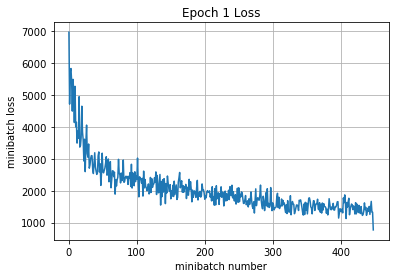

Iteration 500: with minibatch training loss = 22.3 and accuracy of 0.22
Iteration 600: with minibatch training loss = 20 and accuracy of 0.16
Iteration 700: with minibatch training loss = 18.6 and accuracy of 0.23
Iteration 800: with minibatch training loss = 15.3 and accuracy of 0.19
Epoch 2, Overall loss = 19.2 and accuracy of 0.201


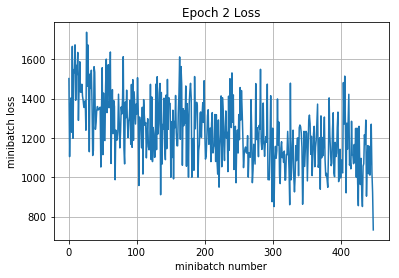

validation


In [ ]:
def run_model(session, predict, loss_val, Xd,         # utility function to run a model
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    
    
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            
            idx = train_indicies[start_idx:start_idx+batch_size]
            X_batch,y_batch = get_subset(Xd,indices = idx)
            # create a feed dictionary for this batch
            feed_dict = {X: X_batch,
                         y: y_batch,
                         is_training: training_now }
            # get batch size
            actual_batch_size = y_batch.shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss * actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
#             print(accuracy.eval())
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('training')
    run_model(sess,y_out,mean_loss,df_train,2,64,100,train_step,True)
    print('validation')
    run_model(sess,y_out,mean_loss,df_val,1,64)